In [1]:
import pandas as pd
df = pd.read_csv("heart_attack_prediction_dataset.csv")#Ensure you have the dataset "heart_attack_prediction_dataset.csv" in the project directory
df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


# Data Cleaning

In [2]:
#checking for null to clean data if any 
null_counts = df.isnull().sum()
print(null_counts)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


# Feature Extraction

In [3]:
#Feature Extraction 
cleaned_data = df.copy()  
cleaned_data[['Systolic Pressure', 'Diastolic Pressure']] = cleaned_data['Blood Pressure'].str.split('/', expand=True)
# Converting 'Systolic Pressure' and 'Diastolic Pressure' columns to numeric data type
cleaned_data['Systolic Pressure'] = pd.to_numeric(cleaned_data['Systolic Pressure'])
cleaned_data['Diastolic Pressure'] = pd.to_numeric(cleaned_data['Diastolic Pressure'])
# original 'Blood Pressure' column and Patient ID (unwanted)
cleaned_data.drop(columns=['Blood Pressure','Patient ID'], inplace=True)
print(cleaned_data.head)


<bound method NDFrame.head of       Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67    Male          208          72         0               0        1   
1      21    Male          389          98         1               1        1   
2      21  Female          324          72         1               0        0   
3      84    Male          383          73         1               1        1   
4      66    Male          318          93         1               1        1   
...   ...     ...          ...         ...       ...             ...      ...   
8758   60    Male          121          61         1               1        1   
8759   28  Female          120          73         1               0        0   
8760   47    Male          250         105         0               1        1   
8761   36    Male          178          60         1               0        1   
8762   25  Female          356          75         1               1        0  

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

# Feature Selection

In [5]:
# Numerical Features
numeric_features = [
    'Age', 'Cholesterol', 'Heart Rate','Exercise Hours Per Week', 
    'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 
     'Systolic Pressure', 'Diastolic Pressure'
]

# Categorical Features
categorical_features = [
    'Sex','Diabetes','Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Diet', 'Previous Heart Problems', 'Medication Use','Stress Level',
    'Physical Activity Days Per Week','Sleep Hours Per Day','Country', 'Continent', 'Hemisphere'
]


In [6]:
# Calculate correlation between numerical features and categorical target variable
correlation_numerical_target = cleaned_data[numeric_features + ['Heart Attack Risk']].corr()['Heart Attack Risk'].drop('Heart Attack Risk')

print("Correlation Coefficients between Numerical Features and Heart Attack Risk:")
print(correlation_numerical_target)

# Calculate correlation between categorical features and categorical target variable
from scipy.stats import chi2_contingency

correlation_categorical_target = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(cleaned_data[feature], cleaned_data['Heart Attack Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    correlation_categorical_target[feature] = chi2

print("\nChi-square Test Statistics between Categorical Features and Heart Attack Risk:")
print(correlation_categorical_target)


Correlation Coefficients between Numerical Features and Heart Attack Risk:
Age                        0.006403
Cholesterol                0.019340
Heart Rate                -0.004251
Exercise Hours Per Week    0.011133
Sedentary Hours Per Day   -0.005613
Income                     0.009628
BMI                        0.000020
Triglycerides              0.010471
Systolic Pressure          0.018585
Diastolic Pressure        -0.007509
Name: Heart Attack Risk, dtype: float64

Chi-square Test Statistics between Categorical Features and Heart Attack Risk:
{'Sex': 0.07049386050272582, 'Diabetes': 2.5251892016562794, 'Family History': 0.017518126641761667, 'Smoking': 0.11738854134563596, 'Obesity': 1.499126753530867, 'Alcohol Consumption': 1.6053437446495067, 'Diet': 0.9547424223231122, 'Previous Heart Problems': 1.1076944849690804e-05, 'Medication Use': 0.03492601858954436, 'Stress Level': 5.147330740605334, 'Physical Activity Days Per Week': 7.993960889232179, 'Sleep Hours Per Day': 6.5508593

In [7]:
selected_numeric_features = ['Cholesterol','Exercise Hours Per Week','Triglycerides','Systolic Pressure']
selected_categorical_features =['Diabetes','Obesity','Alcohol Consumption','Stress Level','Physical Activity Days Per Week','Sleep Hours Per Day','Country','Continent','Hemisphere']

# Scaling and Encoding

In [8]:
X = cleaned_data.drop('Heart Attack Risk', axis=1)
y = cleaned_data['Heart Attack Risk']

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
transformers = [
    ('num', StandardScaler(), selected_numeric_features),
    ('cat', OneHotEncoder(), selected_categorical_features)
]

preprocessor = ColumnTransformer(transformers)
from sklearn.model_selection import train_test_split
X_transformed = preprocessor.fit_transform(X)

print(X_transformed)
X_transformed.shape


  (0, 0)	-0.6415788942469395
  (0, 1)	-1.0108377743433978
  (0, 2)	-0.588539270115778
  (0, 3)	0.8700443894098802
  (0, 4)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 18)	1.0
  (0, 20)	1.0
  (0, 30)	1.0
  (0, 35)	1.0
  (0, 60)	1.0
  (0, 62)	1.0
  (1, 0)	1.5968949484757915
  (1, 1)	-1.4180274757594786
  (1, 2)	-0.8164871356980388
  (1, 3)	1.135714435559395
  (1, 5)	1.0
  (1, 7)	1.0
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 21)	1.0
  (1, 31)	1.0
  (1, 38)	1.0
  (1, 59)	1.0
  :	:
  (8761, 1)	-1.0762384020381839
  (8761, 2)	-1.3573046207069321
  (8761, 3)	-0.610117296280274
  (8761, 5)	1.0
  (8761, 6)	1.0
  (8761, 8)	1.0
  (8761, 14)	1.0
  (8761, 22)	1.0
  (8761, 32)	1.0
  (8761, 37)	1.0
  (8761, 60)	1.0
  (8761, 62)	1.0
  (8762, 0)	1.1887754080898791
  (8762, 1)	1.394930790511074
  (8762, 2)	-1.0623132652475358
  (8762, 3)	0.11098711469698061
  (8762, 5)	1.0
  (8762, 6)	1.0
  (8762, 9)	1.0
  (8762, 17)	1.0
  (8762, 27)	1.0
  (8762, 28)	1.0
  (8762, 52)	1.0
  (8762, 58)	1.0
  (8762, 61)	1.0


(8763, 63)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from matplotlib import pyplot as plt

# Logistic Regression

In [13]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)
# evaluation metrics

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)


print(f"Evaluation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")

[[1689    2]
 [ 935    3]]
Evaluation Metrics for Logistic Regression:
Accuracy: 0.6435907189045265
Precision: 0.6
Recall: 0.0031982942430703624
F1 Score: 0.006362672322375397


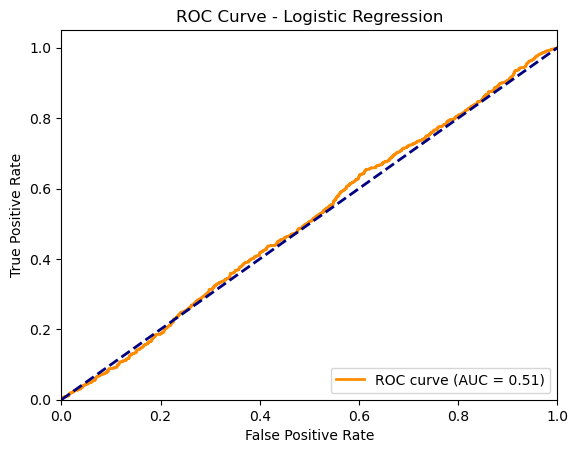

In [14]:
# ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
auc_logreg = auc(fpr_logreg, tpr_logreg)


plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Random Forest Classifier

In [19]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

# evaluation metrics 
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


print("\nEvaluation Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


[[1617   74]
 [ 902   36]]

Evaluation Metrics for Random Forest Classifier:
Accuracy: 0.6287561810574362
Precision: 0.32727272727272727
Recall: 0.03837953091684435
F1 Score: 0.06870229007633588


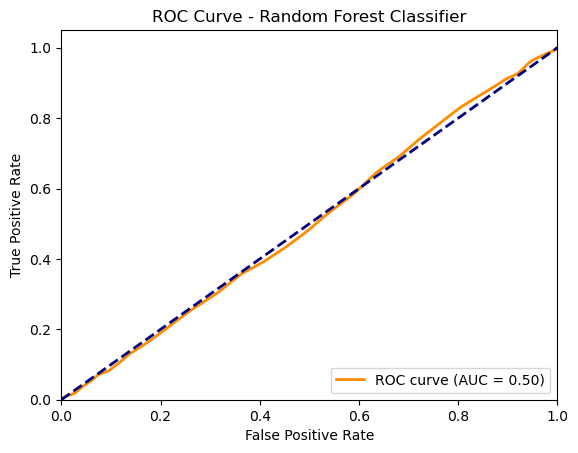

In [21]:
# ROC curve and AUC for Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)


plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


# Decision Tree Classifier

In [22]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(confusion_matrix_dt)
# evaluation metrics 

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


print("\nEvaluation Metrics for Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


[[1047  644]
 [ 568  370]]

Evaluation Metrics for Decision Tree Classifier:
Accuracy: 0.5389882084442754
Precision: 0.36489151873767256
Recall: 0.39445628997867804
F1 Score: 0.3790983606557377


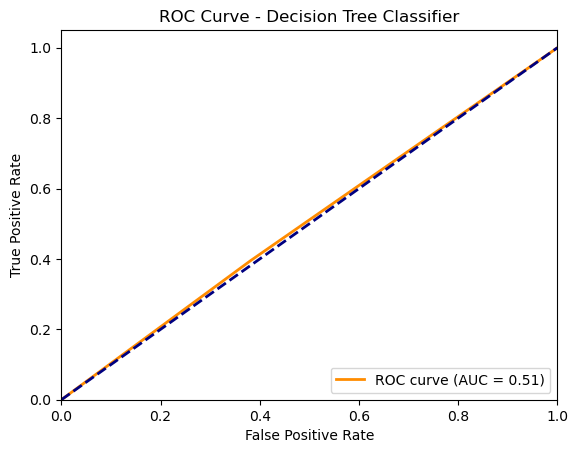

In [23]:
# Calculate ROC curve and AUC for Decision Tree Classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
[[1652   39]
 [ 909   29]]

Evaluation Metrics for Tuned Decision Tree Classifier:
Accuracy: 0.6394066184861164
Precision: 0.4264705882352941
Recall: 0.03091684434968017
F1 Score: 0.05765407554671968


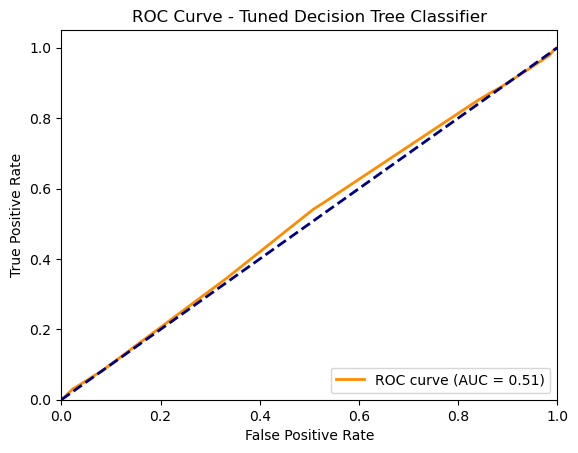

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Use the best hyperparameters to train the model
best_dt_classifier = grid_search.best_estimator_

# Predict using the best model
y_pred_dt_tuned = best_dt_classifier.predict(X_test)

# Confusion matrix
confusion_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
print(confusion_matrix_dt_tuned)

# Evaluation metrics
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)

print("\nEvaluation Metrics for Tuned Decision Tree Classifier:")
print(f"Accuracy: {accuracy_dt_tuned}")
print(f"Precision: {precision_dt_tuned}")
print(f"Recall: {recall_dt_tuned}")
print(f"F1 Score: {f1_dt_tuned}")

# ROC curve and AUC for Tuned Decision Tree Classifier
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)

plt.figure()
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


# class weighting

In [25]:
import pandas as pd
df_target_0 = cleaned_data[cleaned_data.iloc[:, 23] == 0]
print(df_target_0)


      Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67    Male          208          72         0               0        1   
1      21    Male          389          98         1               1        1   
2      21  Female          324          72         1               0        0   
3      84    Male          383          73         1               1        1   
4      66    Male          318          93         1               1        1   
...   ...     ...          ...         ...       ...             ...      ...   
8755   25    Male          307          78         0               1        1   
8757   59  Female          378          99         0               1        1   
8758   60    Male          121          61         1               1        1   
8759   28  Female          120          73         1               0        0   
8761   36    Male          178          60         1               0        1   

      Obesity  Alcohol Cons

In [26]:
df_target_1 = cleaned_data[cleaned_data.iloc[:, 23] == 1]
print(df_target_1)


      Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
5      54  Female          297          48         1               1        1   
6      90    Male          358          84         0               0        1   
7      84    Male          220         107         0               0        1   
12     77    Male          228          68         1               1        1   
13     60    Male          259          85         1               1        1   
...   ...     ...          ...         ...       ...             ...      ...   
8753   82    Male          311          87         0               1        1   
8754   80  Female          383          91         1               1        1   
8756   22    Male          347         108         0               1        1   
8760   47    Male          250         105         0               1        1   
8762   25  Female          356          75         1               1        0   

      Obesity  Alcohol Cons

In [37]:
df2 = pd.concat([df_target_0]*2 + [df_target_1] * 3, ignore_index=True)
df2.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [29]:
df2.shape

(23804, 26)

In [38]:
# Numerical Features
selected_numeric_features = ['Cholesterol','Exercise Hours Per Week','Triglycerides','Systolic Pressure']
selected_categorical_features =['Diabetes','Obesity','Alcohol Consumption','Stress Level','Physical Activity Days Per Week','Sleep Hours Per Day','Country','Continent','Hemisphere']
X = df2.drop('Heart Attack Risk', axis=1)
y = df2['Heart Attack Risk']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
transformers_cw = [
    ('num', StandardScaler(), selected_numeric_features),
    ('cat', OneHotEncoder(), selected_categorical_features)
]

preprocessor_cw = ColumnTransformer(transformers_cw)
from sklearn.model_selection import train_test_split
X_transformed_cw = preprocessor_cw.fit_transform(X)
print(X_transformed_cw)
X_transformed_cw.shape


  (0, 0)	-0.6455490885004939
  (0, 1)	-1.012377017999033
  (0, 2)	-0.5894492099981075
  (0, 3)	0.8661607226119898
  (0, 4)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 18)	1.0
  (0, 20)	1.0
  (0, 30)	1.0
  (0, 35)	1.0
  (0, 60)	1.0
  (0, 62)	1.0
  (1, 0)	1.5930566175397158
  (1, 1)	-1.4192756071947061
  (1, 2)	-0.8169265948477589
  (1, 3)	1.1317985981985972
  (1, 5)	1.0
  (1, 7)	1.0
  (1, 9)	1.0
  (1, 10)	1.0
  (1, 21)	1.0
  (1, 31)	1.0
  (1, 38)	1.0
  (1, 59)	1.0
  :	:
  (20663, 1)	-1.1885742638386776
  (20663, 2)	0.4854929419384805
  (20663, 3)	0.9800055264348215
  (20663, 4)	1.0
  (20663, 7)	1.0
  (20663, 9)	1.0
  (20663, 14)	1.0
  (20663, 24)	1.0
  (20663, 28)	1.0
  (20663, 37)	1.0
  (20663, 60)	1.0
  (20663, 62)	1.0
  (20664, 0)	1.1849130357754787
  (20664, 1)	1.3916715902203214
  (20664, 2)	-1.0622453432150298
  (20664, 3)	0.10719536379311205
  (20664, 5)	1.0
  (20664, 6)	1.0
  (20664, 9)	1.0
  (20664, 17)	1.0
  (20664, 27)	1.0
  (20664, 28)	1.0
  (20664, 52)	1.0
  (20664, 58)	1.0
  (2066

(20665, 63)

In [39]:
X_train_cw, X_test_cw, y_train_cw, y_test_cw = train_test_split(X_transformed_cw, y, test_size=0.3, random_state=42)

Best Hyperparameters for Decision Tree Classifier:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix for Tuned Decision Tree Classifier after class weighting:
[[2983  404]
 [ 162 2651]]

Evaluation Metrics for Tuned Decision Tree Classifier after class weighting:
Accuracy: 0.9087096774193548
Precision: 0.8677577741407528
Recall: 0.9424102381798791
F1 Score: 0.9035446489434218


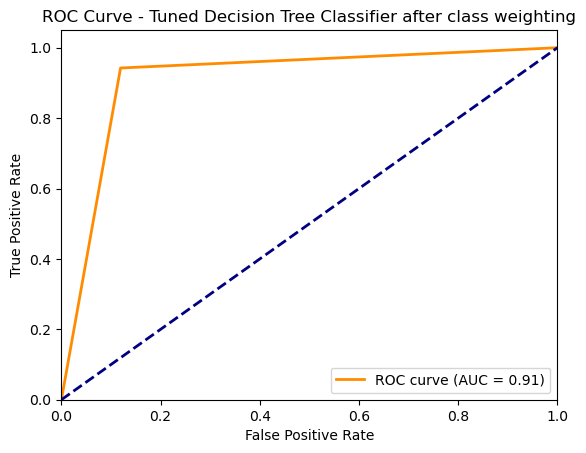

In [40]:

# Hyperparameter tuning

# Define the hyperparameters grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search_dt.fit(X_train_cw, y_train_cw)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree Classifier:")
print(best_params_dt)

# Use the best hyperparameters to train the model
best_dt_classifier = grid_search_dt.best_estimator_

# Predict using the best model
y_pred_dt_tuned_cw = best_dt_classifier.predict(X_test_cw)

# Confusion matrix
confusion_matrix_dt_tuned_cw = confusion_matrix(y_test_cw, y_pred_dt_tuned_cw)
print("\nConfusion Matrix for Tuned Decision Tree Classifier after class weighting:")
print(confusion_matrix_dt_tuned_cw)

# Evaluation metrics
accuracy_dt_tuned_cw = accuracy_score(y_test_cw, y_pred_dt_tuned_cw)
precision_dt_tuned_cw = precision_score(y_test_cw, y_pred_dt_tuned_cw)
recall_dt_tuned_cw = recall_score(y_test_cw, y_pred_dt_tuned_cw)
f1_dt_tuned_cw = f1_score(y_test_cw, y_pred_dt_tuned_cw)

print("\nEvaluation Metrics for Tuned Decision Tree Classifier after class weighting:")
print(f"Accuracy: {accuracy_dt_tuned_cw}")
print(f"Precision: {precision_dt_tuned_cw}")
print(f"Recall: {recall_dt_tuned_cw}")
print(f"F1 Score: {f1_dt_tuned_cw}")

# ROC curve and AUC for Tuned Decision Tree Classifier after class weighting
fpr_dt_tuned_cw, tpr_dt_tuned_cw, _ = roc_curve(y_test_cw, best_dt_classifier.predict_proba(X_test_cw)[:, 1])
auc_dt_tuned_cw = auc(fpr_dt_tuned_cw, tpr_dt_tuned_cw)

plt.figure()
plt.plot(fpr_dt_tuned_cw, tpr_dt_tuned_cw, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt_tuned_cw:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree Classifier after class weighting')
plt.legend(loc="lower right")
plt.show()
